# <center><font color= blue > 606 - CAPSTONE PROJECT </font></center>

##<center><font color= blue > PREDICTING SALES FOR MULTIPLE WALMART STORES </font></center>
### <center><font color= orange > ~ David Gill </font>







### <b>Importing Required Libraries/Modules for EDA - Exploratory Data Analysis

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import visuals as vs
from time import time
from IPython.display import display # Allows the use of display() for displaying DataFrames
import matplotlib.pyplot as plt
import seaborn as sns

### <b>Analyzing first csv file - Store.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving stores.csv to stores.csv


In [3]:
df_Stores = pd.read_csv('stores.csv')   #Read csv file and viewing sample data
df_Stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
df_Stores.shape   #Number of Rows and Columns

(45, 3)

In [5]:
df_Stores.dtypes    #DataType of attributes

Store     int64
Type     object
Size      int64
dtype: object

In [0]:
df_Stores_Dup = df_Stores.duplicated()    #Checking for duplicates
#print(df_Stores_Dup)

In [21]:
df_Stores_Distinct = df_Stores['Type'].unique()   #Distinct Store types
df_Stores_Distinct

array(['A', 'B', 'C'], dtype=object)

### <b>Pie Chart respresentation for store type

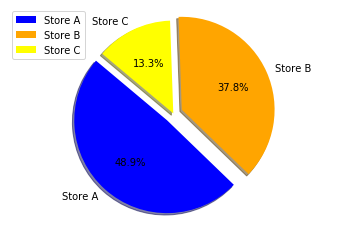

In [22]:
labels = 'Store A','Store B','Store C'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
colors = ['blue', 'orange', 'yellow']
explode = (0.1, 0.1, 0)  # separate out each pie
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

### <b>Box plot respresentation for store sizes

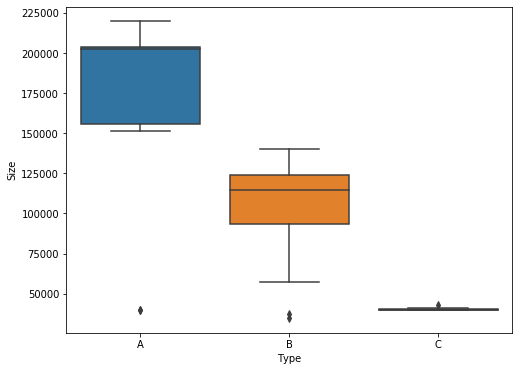

In [18]:
store_type = pd.concat([df_Stores['Type'], df_Stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)

In [22]:
#df_Stores.isnull().values.any()     #Find missing values
df_Stores.isnull().sum().sum()

0

In [23]:
NAN_count = df_Stores["Type"].isna().sum()    #Checking for NAN Values
NAN_count
NAN_count = df_Stores["Store"].isna().sum()
NAN_count
NAN_count = df_Stores["Size"].isna().sum()
NAN_count

0

### <b>EDA result for first file -

##### - It contains 45 Rows, for 45 stores 
##### - It contains 3 Columns/Attributes - <b>Store, Type, Size
##### - There are 3 distinct Store Types - <b> A, B, C, with A being the largest and C the smallest
##### - There is no overlapped area in the sizes of the stores
##### - There is no missing data in the file

### <b>Analyzing second csv file - Features.csv

In [41]:
from google.colab import files
uploaded = files.upload()

Saving features.csv to features (1).csv


In [42]:
df_Features = pd.read_csv('features.csv')   #Read csv file and viewing sample data
df_Features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [26]:
df_Features.shape   #Number of Rows and Columns

(8190, 12)

In [27]:
df_Features.dtypes    #DataType of attributes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [29]:
df_Features.isnull().values.any()     #Find missing values

True

In [30]:
df_Features["MarkDown1"].isnull().sum()   #Find NaN values

4158

In [31]:
df_Features["MarkDown2"].isnull().sum()

5269

In [32]:
df_Features["MarkDown3"].isnull().sum()

4577

In [33]:
df_Features["MarkDown4"].isnull().sum()

4726

In [34]:
df_Features["MarkDown5"].isnull().sum()

4140

In [35]:
df_Features["CPI"].isnull().sum()

585

In [36]:
df_Features["Unemployment"].isnull().sum()

585

In [37]:
df_Features["IsHoliday"].isnull().sum()

0

In [38]:
df_Features["Store"].isnull().sum()

0

In [39]:
df_Features["Date"].isnull().sum()

0

#### <b>Variation of Unemployment and CPI over Time

In [0]:
#df_Features.plot(x="Date", y=["Unemployment", "CPI"], kind="bar")
#plt.show()
#df_Features['CPI'].unique()

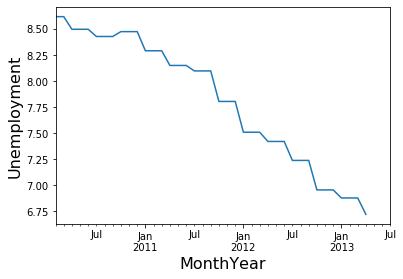

In [27]:
df_Features["MonthYear"] = pd.to_datetime(df_Features['Date']).dt.to_period('M')
df_Features_MonthYear = df_Features.groupby("MonthYear").mean()
#df_Features_MonthYear
#df_Features_MonthYear.plot(x="MonthYear", y=["Unemployment"], kind="line")
#plt.show()
df_Features['Unemployment'].groupby(df_Features['MonthYear']).mean().plot(kind = "line",rot = 0)
plt.xlabel('MonthYear', fontsize = 16)
plt.ylabel('Unemployment', fontsize = 16)
plt.show()

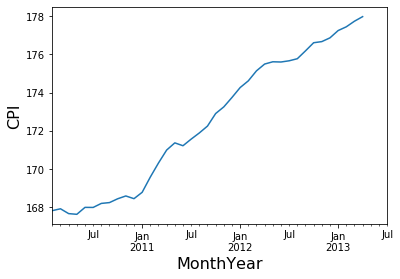

In [26]:
df_Features['CPI'].groupby(df_Features['MonthYear']).mean().plot(kind = "line",rot = 0)
plt.xlabel('MonthYear', fontsize = 16)
plt.ylabel('CPI', fontsize = 16)
plt.show()

### <b>EDA result for second file -

##### - It contains 8190 Rows
##### - It contains 12 Columns/Attributes - <b>Store, Date, Temperature,  Fuel_Price, MarkDown1, MarkDown2,	MarkDown3, MarkDown4,	MarkDown5, CPI, Unemployment, IsHoliday
##### - There are no duplicates
##### - Out if 8190 records, the below attributes have NaN Value -
#####MarkDown1 - 4158
#####MarkDown2 - 5269
#####MarkDown3 - 4577
#####MarkDown4 - 4726
#####MarkDown5 - 4140
#####CPI - 585
#####Unemployment - 585
#### - Another interesting thing noted is that CPI increased and Unemployment decreased over the given period of time

### <b>Analyzing third csv file - Train.csv

In [25]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [26]:
df_Train = pd.read_csv('train.csv')   #Read csv file and viewing sample data
df_Train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [27]:
df_Train.shape   #Number of Rows and Columns

(421570, 5)

In [28]:
df_Train_Dup = df_Train[df_Train.duplicated()]    #Checking for duplicates
print(df_Train_Dup)

Empty DataFrame
Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday]
Index: []


### <b>Plotting affect of holidays on sales

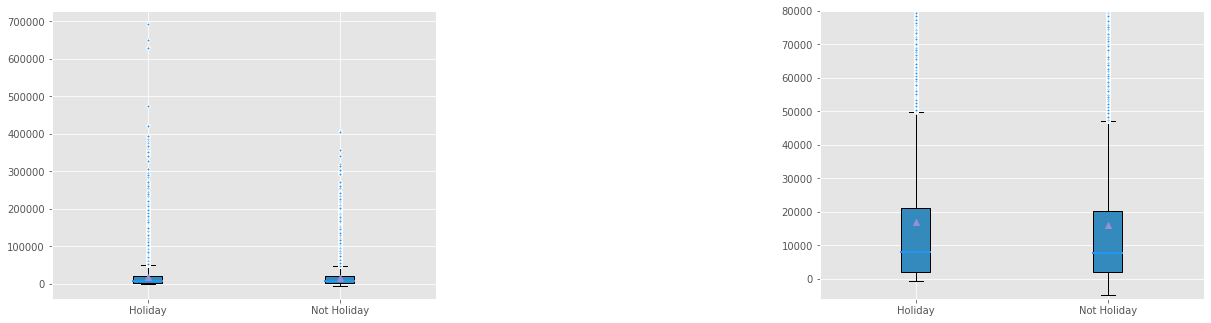

In [29]:
plt.style.use('ggplot')
fig, axes = plt.subplots(1,2, figsize = (20,5))
fig.subplots_adjust(wspace=1, hspace=1)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
sales_holiday=df_Train[['IsHoliday','Weekly_Sales']]
target=[sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==True],sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==False]]
labels=['Holiday','Not Holiday']
#median
medianprop={'color':'#2196F3',
            'linewidth': 2,
            'linestyle':'-'}
# outliers
flierprop={'color' : '#EC407A',
          'marker' : 'o',
          'markerfacecolor': '#2196F3',
          'markeredgecolor':'white',
          'markersize' : 3,
          'linestyle' : 'None',
          'linewidth' : 0.1}
axes[0].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True,
                  flierprops=flierprop,
                  medianprops=medianprop)
axes[1].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True,
                  flierprops=flierprop,
                  medianprops=medianprop)
axes[1].set_ylim(-6000,80000)
plt.show()

###<b> Understanding Frequency of Sales for each department via a plot

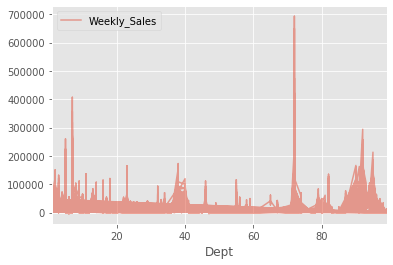

In [31]:
df_Train.plot(kind ='line', x='Dept', y='Weekly_Sales', alpha=1.5,fig=(4,5))

### <b>EDA Result on Store Sales
##### - Sales on holidays is a little bit more compared to non-holidays
##### - The Deparment with highest sales lies b/w 60 - 80

### <b>Analyzing fourth csv file - Test.csv

In [34]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [35]:
df_Test = pd.read_csv('test.csv')   #Read csv file and viewing sample data
df_Test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [36]:
df_Test.shape   #Number of Rows and Columns

(115064, 4)

### <b>EDA result for fourth file -

##### - It contains 115064 Rows
##### - It contains 4 Columns/Attributes - <b>Store, Department, Date, IsHoliday

### <b>Merging the Stores, Features and Train dataframes/datasets

In [45]:
df_Features['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [46]:
df_Stores['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [47]:
df_Train['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [43]:
df_Store_Feature = pd.merge(df_Stores,df_Features, on='Store')    #Merging on the common identifier

df_Store_Feature.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,A,151315,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,A,151315,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,A,151315,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [50]:
df_Train_Store_Feature = pd.merge(df_Train,df_Store_Feature, how ='left', on = ['Store','Date'])
df_Train_Store_Feature.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
